<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [232]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

#imported by me (Norah)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [233]:
lines = [line.rstrip('\n').split(',') for line in open('sat_scores.csv')]

sat_dict ={lines[0][0]:[], lines[0][1]:[], lines[0][2]:[], lines[0][3]:[]}

for line in lines[1:]:
    sat_dict['State'].append(line[0])
    sat_dict['Rate'].append(int(line[1]))
    sat_dict['Verbal'].append(int(line[2]))
    sat_dict['Math'].append(int(line[3]))


### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [234]:
sat_df = pd.DataFrame (sat_dict)

In [235]:
sat_df.head(3)

Math  Rate State  Verbal
0   510    82    CT     509
1   513    81    NJ     499
2   515    79    MA     511

In [236]:
sat_df = pd.read_csv ('sat_scores.csv')

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
sat_df.head(10)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [7]:
# is it correct?
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [8]:
sat_df.shape

(52, 4)

In [198]:
data_dictionary = {
   'State': ['object','represent the name of the states'],
    'Rate': ['int','Rate values'],
    'Verbal': ['int','Verbal values'],
    'Math': ['int','Math values'],
    'shape': sat_df.shape
    }

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

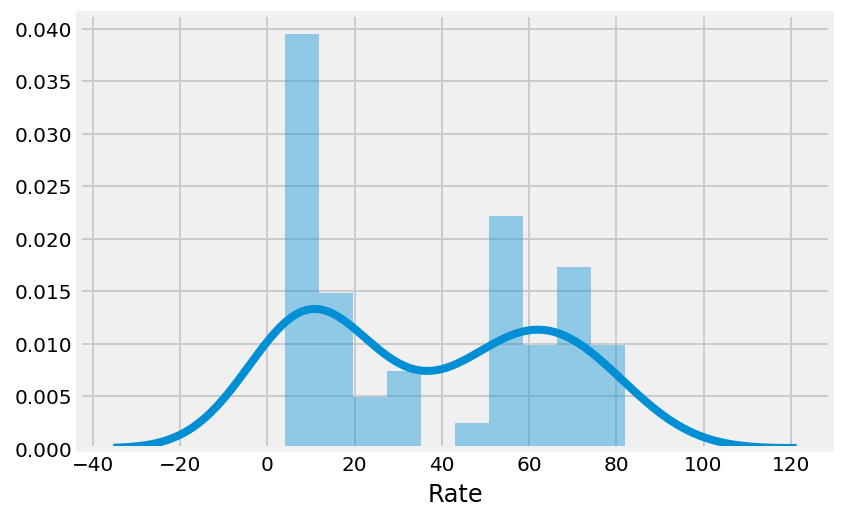

In [10]:
sns.distplot(sat_df.Rate, kde=True , bins=10, );

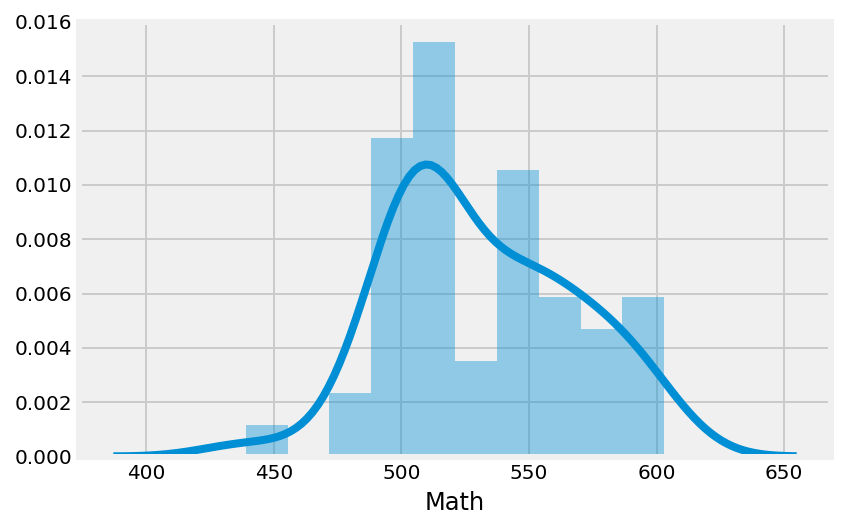

In [11]:
sns.distplot(sat_df.Math, kde=True , bins=10);

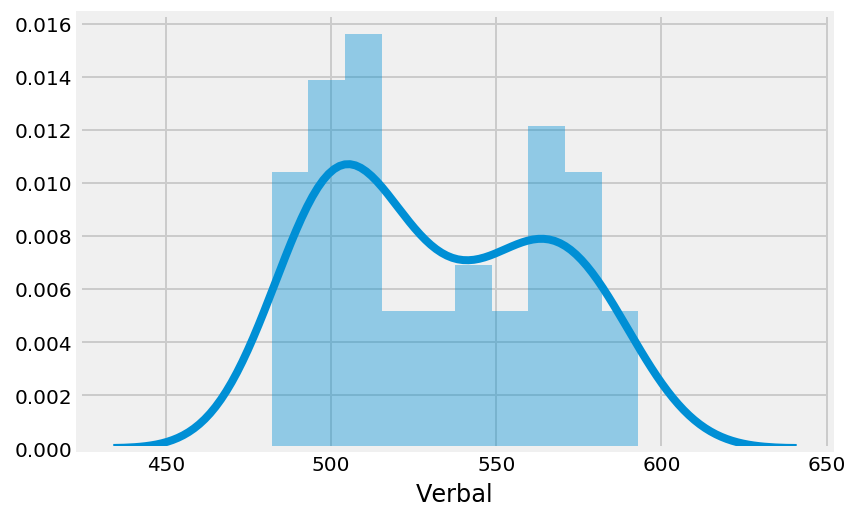

In [12]:
sns.distplot(sat_df.Verbal, kde=True , bins=10);

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

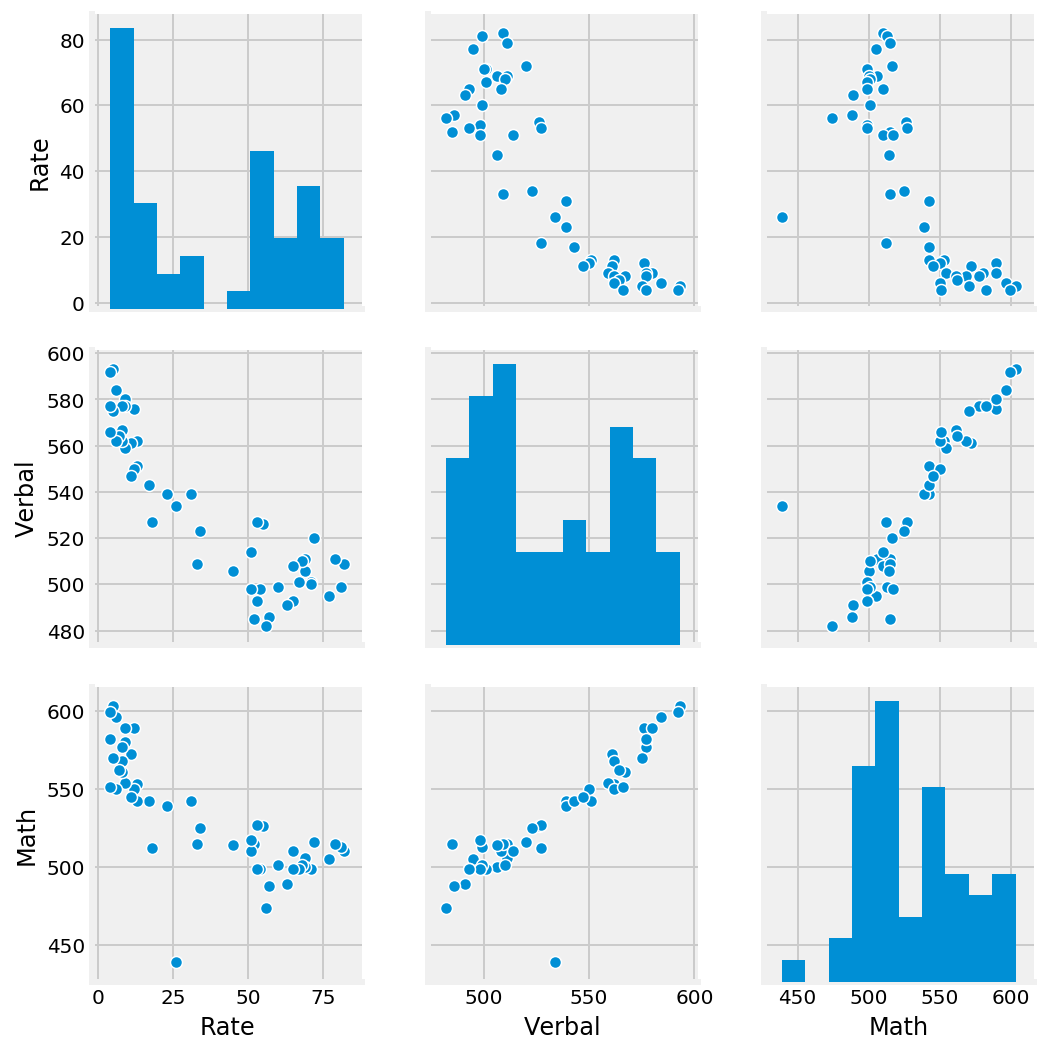

In [13]:
sns.pairplot(sat_df);

### Explanation:
* Rate: has a negative correlation with Verbal and Math variables.
* Verbal: has a positive correlation with Math and a negative correlation with Rate.
* Math: has a positive correlation with Verbal and a negative correlation with Rate.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

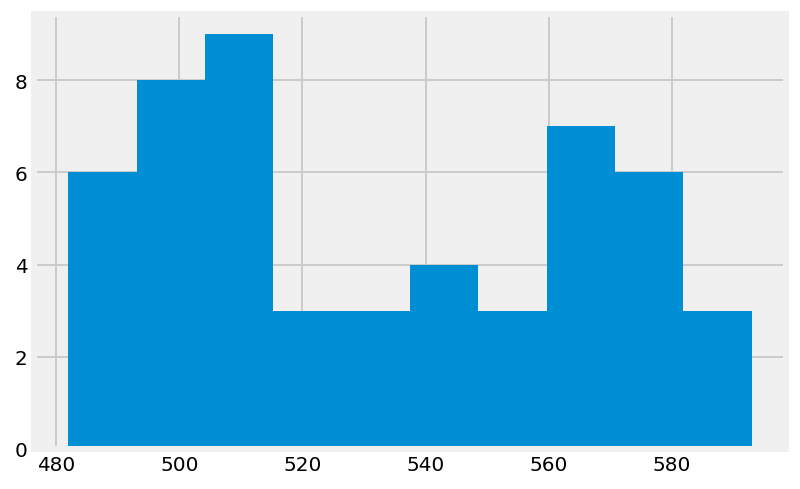

In [14]:
sat_df.Verbal.hist();

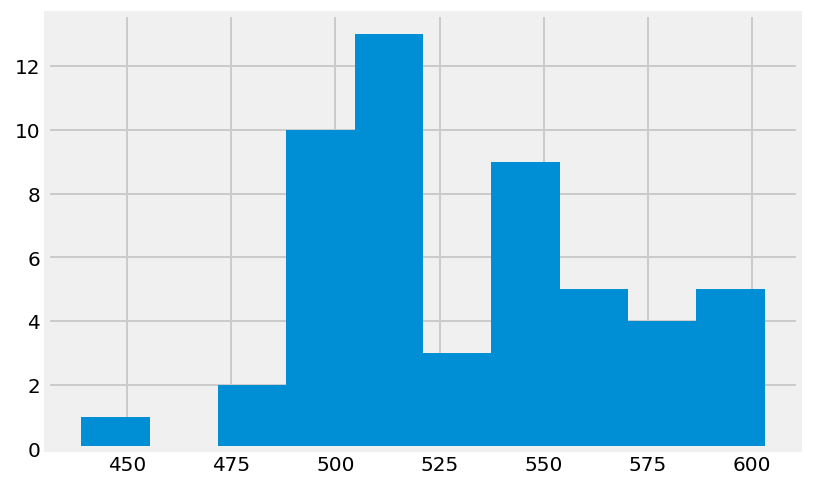

In [15]:
sat_df.Math.hist();

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

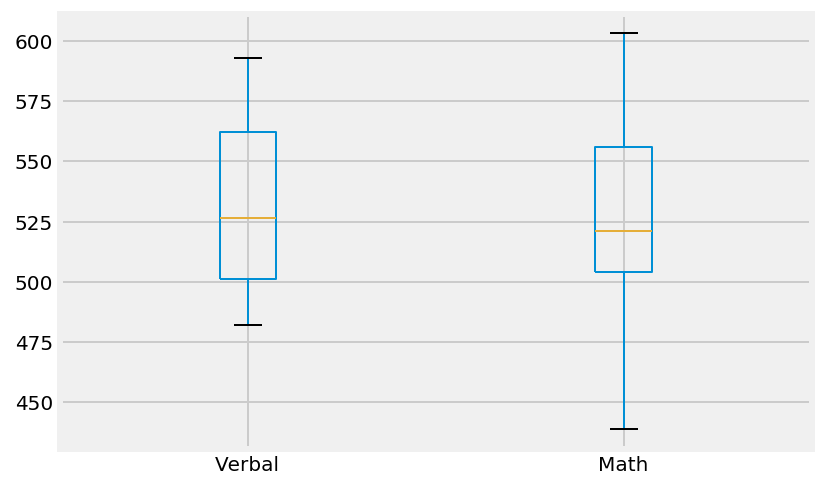

In [16]:
sat_df.boxplot(['Verbal', 'Math']);

### Answer:
####  Benefits of using a boxplot as compared to a scatterplot or a histogram:
* Boxplot does provide some information that the histogram does not (at least, not explicitly). 

* Boxplot provides the median, 25th and 75th percentile, 

* Boxplot shows the min and max (not outliers).

* Boxplot explicitly separates the points that are considered outliers. 

* Boxplot provides some indication of the data’s symmetry and skewness (as the histogram). 

* Plotting boxplots side by side can be a useful way of doing this without distracting us with other details that we may not care about.

* Boxplot is a good way to summarize large amounts of data. 

#### Benefits of using scatter plot and histogram over boxplot:
* A scatter plot is an excellent tool for comparing pairs of values to see if they are related.

* Boxplot is not effective like histogram for describing the distribution of a single sample since they reduce it to a few points and that doesn't tell us a lot.

### What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?

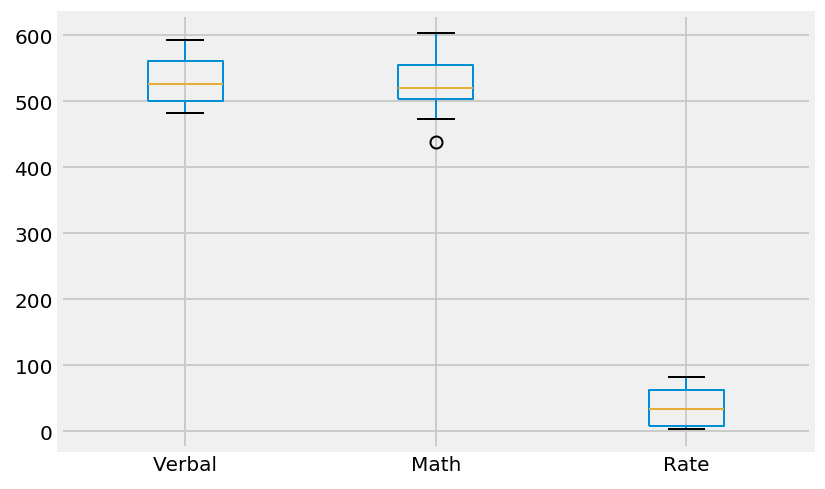

In [200]:
sat_df.boxplot(['Verbal', 'Math','Rate'] , whis=True);

### Answer:

The boxplots are hard to visualize together since Rate variable has a different scale compared with Verbal and Math variables.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


#### Answer:

we need to rescal the variables by using **standardization**, which forces the distribution of each variable to have a mean of 0 and a standard deviation of 1.

        standardized_variable = (variable - mean_of_variable) / std_dev_of_variable
        
        
The standardized variable is also often referred to as the z-score of the original variable. From the standardized variable it is easy to determine which data points are **outliers**.





we will standardize the numeric columns all at once by using var_standardized function. Like this:

        sat_df_stand = (sat_df - sat_df.mean()) / sat_df.std()

Create a standardized version of the data and recreate the boxplot. Now we can examine the differences in the shape of distributions across our variables Verbal, Math and Rate.

In [18]:
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

In [19]:
sat_df_stand = var_standardized(sat_df[['Verbal', 'Math','Rate']])

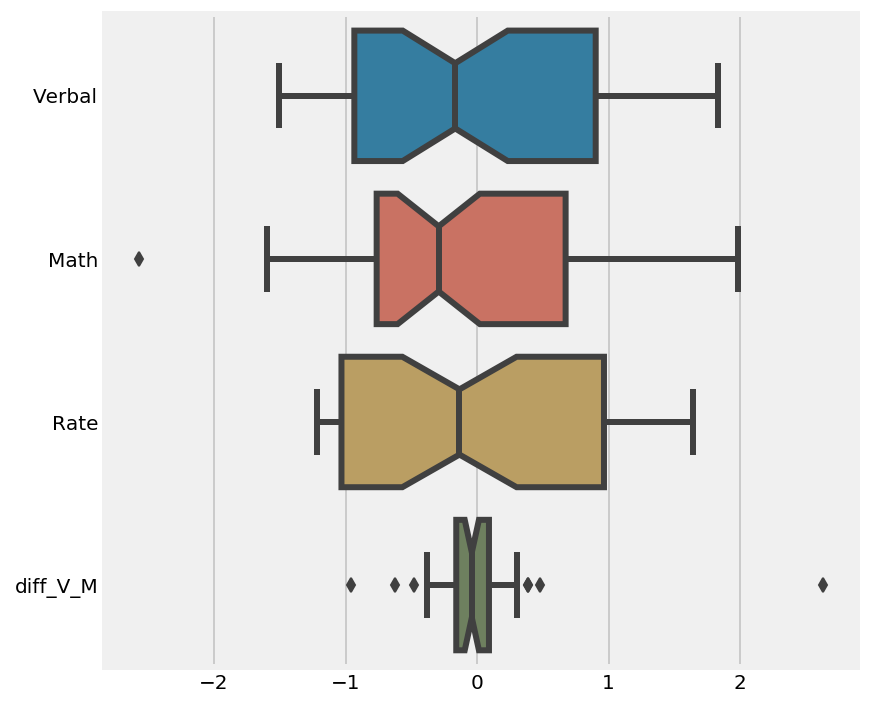

In [199]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()

sns.boxplot(data=sat_df_stand, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, whis=True)
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [21]:
# number of states are above the mean
len(sat_df_stand[sat_df_stand.Verbal > sat_df_stand.Verbal.mean()])

24

In [22]:
len(sat_df_stand)

52

In [23]:
sat_df_stand[sat_df_stand.Verbal > sat_df_stand.Verbal.mean()]

Verbal      Math      Rate
26  0.210035  0.291545 -0.225401
27  0.059597 -2.568376 -0.408539
28  0.210035  0.208247 -0.518422
30  0.330386  0.291545 -0.738188
31  0.902051  0.596974 -0.884698
32  0.571087  0.291545 -0.884698
33  1.323278  1.596558 -0.921326
34  0.540999  0.513675 -0.921326
35  0.450736  0.374844 -0.957954
36  0.871963  1.124532 -0.957954
37  1.443629  1.596558 -1.031209
38  1.353366  1.346662 -1.031209
39  0.811788  0.624740 -1.031209
40  0.902051  1.013467 -1.067837
41  1.052489  0.819104 -1.067837
42  1.353366  1.263363 -1.067837
43  0.962226  0.846870 -1.104464
44  1.563979  1.790922 -1.141092
45  0.902051  0.513675 -1.141092
46  1.293190  1.069000 -1.177719
47  1.834768  1.985285 -1.177719
48  1.353366  1.402194 -1.214347
49  1.804681  1.874220 -1.214347
50  1.022402  0.541441 -1.214347

#### What does this tell you about the distribution of Verbal scores?
#### Ans:
half of the states are above the mean, so it seams to be nearly normaly distributed, but we can not ensure about that antil we know abut the median and mood.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

#### Ans:
if the two list equals that will endecate Verbal list is normaly distributed, but as I get belwo the (list of states greater than the mean of Verbal) is less than (list of states greater than the median) so it verbal is not normaly disributed.

In [24]:
len(sat_df_stand[sat_df_stand.Verbal > sat_df_stand.Verbal.median()])

26

In [25]:
sat_df_stand[sat_df_stand.Verbal > sat_df_stand.Verbal.median()]

Verbal      Math      Rate
19 -0.151017 -0.124948  0.580407
26  0.210035  0.291545 -0.225401
27  0.059597 -2.568376 -0.408539
28  0.210035  0.208247 -0.518422
29 -0.151017 -0.541441 -0.701560
30  0.330386  0.291545 -0.738188
31  0.902051  0.596974 -0.884698
32  0.571087  0.291545 -0.884698
33  1.323278  1.596558 -0.921326
34  0.540999  0.513675 -0.921326
35  0.450736  0.374844 -0.957954
36  0.871963  1.124532 -0.957954
37  1.443629  1.596558 -1.031209
38  1.353366  1.346662 -1.031209
39  0.811788  0.624740 -1.031209
40  0.902051  1.013467 -1.067837
41  1.052489  0.819104 -1.067837
42  1.353366  1.263363 -1.067837
43  0.962226  0.846870 -1.104464
44  1.563979  1.790922 -1.141092
45  0.902051  0.513675 -1.141092
46  1.293190  1.069000 -1.177719
47  1.834768  1.985285 -1.177719
48  1.353366  1.402194 -1.214347
49  1.804681  1.874220 -1.214347
50  1.022402  0.541441 -1.214347

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [237]:
sat_df_stand['diff_V_M'] = sat_df_stand.Verbal - sat_df_stand.Math

In [238]:
sat_df['diff_V_M'] = sat_df.Verbal - sat_df.Math

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [35]:
df_1 = sat_df.nlargest(10, 'diff_V_M')

In [36]:
df_2 = sat_df.nsmallest(10, 'diff_V_M')

In [39]:
df_1.head(3)

State  Rate  Verbal  Math  diff_V_M
27    OH    26     534   439        95
29    WV    18     527   512        15
50    MS     4     566   551        15

In [40]:
df_2.head(3)

State  Rate  Verbal  Math  diff_V_M
21    HI    52     485   515       -30
23    CA    51     498   517       -19
1     NJ    81     499   513       -14

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [43]:
sat_df.corr()

Rate    Verbal      Math  diff_V_M
Rate      1.000000 -0.886432 -0.773746 -0.101412
Verbal   -0.886432  1.000000  0.899871  0.052600
Math     -0.773746  0.899871  1.000000 -0.388219
diff_V_M -0.101412  0.052600 -0.388219  1.000000

#### Ans:
It tell us the correlation between the variables. like Rate and Verbal have hight negative correlation, and Verbal has hight correlation with Math.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [44]:
sat_df.describe()

Rate      Verbal        Math   diff_V_M
count  52.000000   52.000000   52.000000  52.000000
mean   37.153846  532.019231  531.500000   0.519231
std    27.301788   33.236225   36.014975  15.729939
min     4.000000  482.000000  439.000000 -30.000000
25%     9.000000  501.000000  504.000000  -6.000000
50%    33.500000  526.500000  521.000000   0.000000
75%    63.500000  562.000000  555.750000   4.250000
max    82.000000  593.000000  603.000000  95.000000

#### Ans:


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.

Correlation is simply a representation of covariance so the result must lay between -1 (perfectly inversely correlated) an +1 (perfectly positively correlated), noting that a value close to zero means that two variables are uncorrelated.

Covariance is unbounded and lacks a context when comparing to other covariances. By Normalising/adjusting/standardising covariances into a correlation, data sets can be compared more easily.


2. What is the process to convert the covariance into the correlation?


The problem with covariances is that they are hard to compare. So the solution to this is to 'normalize' the covariance:
you divide the covariance by something that represents the diversity and scale in both the covariates, and end up with a value that is assured to be between -1 and 1: the correlation. Whatever unit your original variables were in, you will always get the same result, and this will also ensure that you can, to a certain degree, compare whether two variables 'correlate' more than two others, simply by comparing their correlation.


3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?


The problem with covariances is that they are hard to compare becuse it is unbounded. But Correlation is bounded between -1 and 1, so that make it easy to compare between varibles relations.

In [45]:
sat_df.cov()

Rate       Verbal         Math    diff_V_M
Rate      745.387632  -804.355958  -760.803922  -43.552036
Verbal   -804.355958  1104.646682  1077.147059   27.499623
Math     -760.803922  1077.147059  1297.078431 -219.931373
diff_V_M  -43.552036    27.499623  -219.931373  247.430995

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [239]:
drug_df = pd.read_csv('drug-use-by-age.csv')

In [240]:
drug_df.shape

(17, 28)

In [241]:
drug_df

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798          3.9                3.0            1.1   
1      13  2757          8.5                6.0            3.4   
2      14  2792         18.1                5.0            8.7   
3      15  2956         29.2                6.0           14.5   
4      16  3058         40.1               10.0           22.5   
5      17  3038         49.3               13.0           28.0   
6      18  2469         58.7               24.0           33.7   
7      19  2223         64.6               36.0           33.4   
8      20  2271         69.7               48.0           34.0   
9      21  2354         83.2               52.0           33.0   
10  22-23  4707         84.2               52.0           28.4   
11  24-25  4591         83.1               52.0           24.9   
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5               52.0           16.4   
14  35-49  7391         75.0               52.0           10.4   
15  50-64  3923         67.2               52.0            7.3   
16    65+  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                   4.0          0.1               5.0        0.0   
1                  15.0          0.1               1.0        0.0   
2                  24.0          0.1               5.5        0.0   
3                  25.0          0.5               4.0        0.1   
4                  30.0          1.0               7.0        0.0   
5                  36.0          2.0               5.0        0.1   
6                  52.0          3.2               5.0        0.4   
7                  60.0          4.1               5.5        0.5   
8                  60.0          4.9               8.0        0.6   
9                  52.0          4.8               5.0        0.5   
10                 52.0          4.5               5.0        0.5   
11                 60.0          4.0               6.0        0.5   
12                 52.0          3.2               5.0        0.4   
13                 72.0          2.1               8.0        0.5   
14                 48.0          1.5              15.0        0.5   
15                 52.0          0.9              36.0        0.4   
16                 36.0          0.0                 -        0.0   

   crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0                -        ...                    0.1                24.5   
1              3.0        ...                    0.1                41.0   
2                -        ...                    0.4                 4.5   
3              9.5        ...                    0.8                 3.0   
4              1.0        ...                    1.1                 4.0   
5             21.0        ...                    1.4                 6.0   
6             10.0        ...                    1.7                 7.0   
7              2.0        ...                    1.5                 7.5   
8              5.0        ...                    1.7                12.0   
9             17.0        ...                    1.3                13.5   
10             5.0        ...                    1.7                17.5   
11             6.0        ...                    1.3                20.0   
12             6.0        ...                    1.2                13.5   
13            15.0        ...                    0.9                46.0   
14            48.0        ...                    0.3                12.0   
15            62.0        ...                    0.4                 5.0   
16               -        ...                    0.0                   -   

    tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0                0.2                    52.0            0.2   
1                0.3                    25.5            0.3   
2               

In [54]:
# Are variables missing? No
drug_df.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [49]:
drug_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [244]:
# convert age column from object to int
def mean_age(age_range):
    if '+' not in age_range:
        return np.mean([int(i) for i in age_range.split('-')])
    else:
        return int(age_range.replace('+',''))        
    
# create a mask for all age values that have dash or plus sign like: 22-25 or 60+
age_mask = drug_df.age.astype(str).str.isnumeric()
drug_df.loc[~age_mask, 'age'] = drug_df[~age_mask].age.apply(mean_age)

drug_df.loc[: , 'age'] = drug_df.age.astype('int64')

In [242]:
# convert some columns that contain dash value and convert them from object to float data type
def isfloat(s):
    try:
        float(s)
    except ValueError:
        return False
    else:
        return True
    
col_to_covert = ['cocaine-frequency', 'crack-frequency','inhalant-frequency',
                 'oxycontin-frequency','meth-frequency','heroin-frequency']

for column in col_to_covert:
    mask = drug_df[column].astype(str).apply(isfloat)
    drug_df.loc[~mask, column] = drug_df[~mask][column].apply(lambda x:0.0)
    drug_df.loc[: , column] = drug_df[column].astype(float)

In [150]:
drug_df.dtypes

age                          int64
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

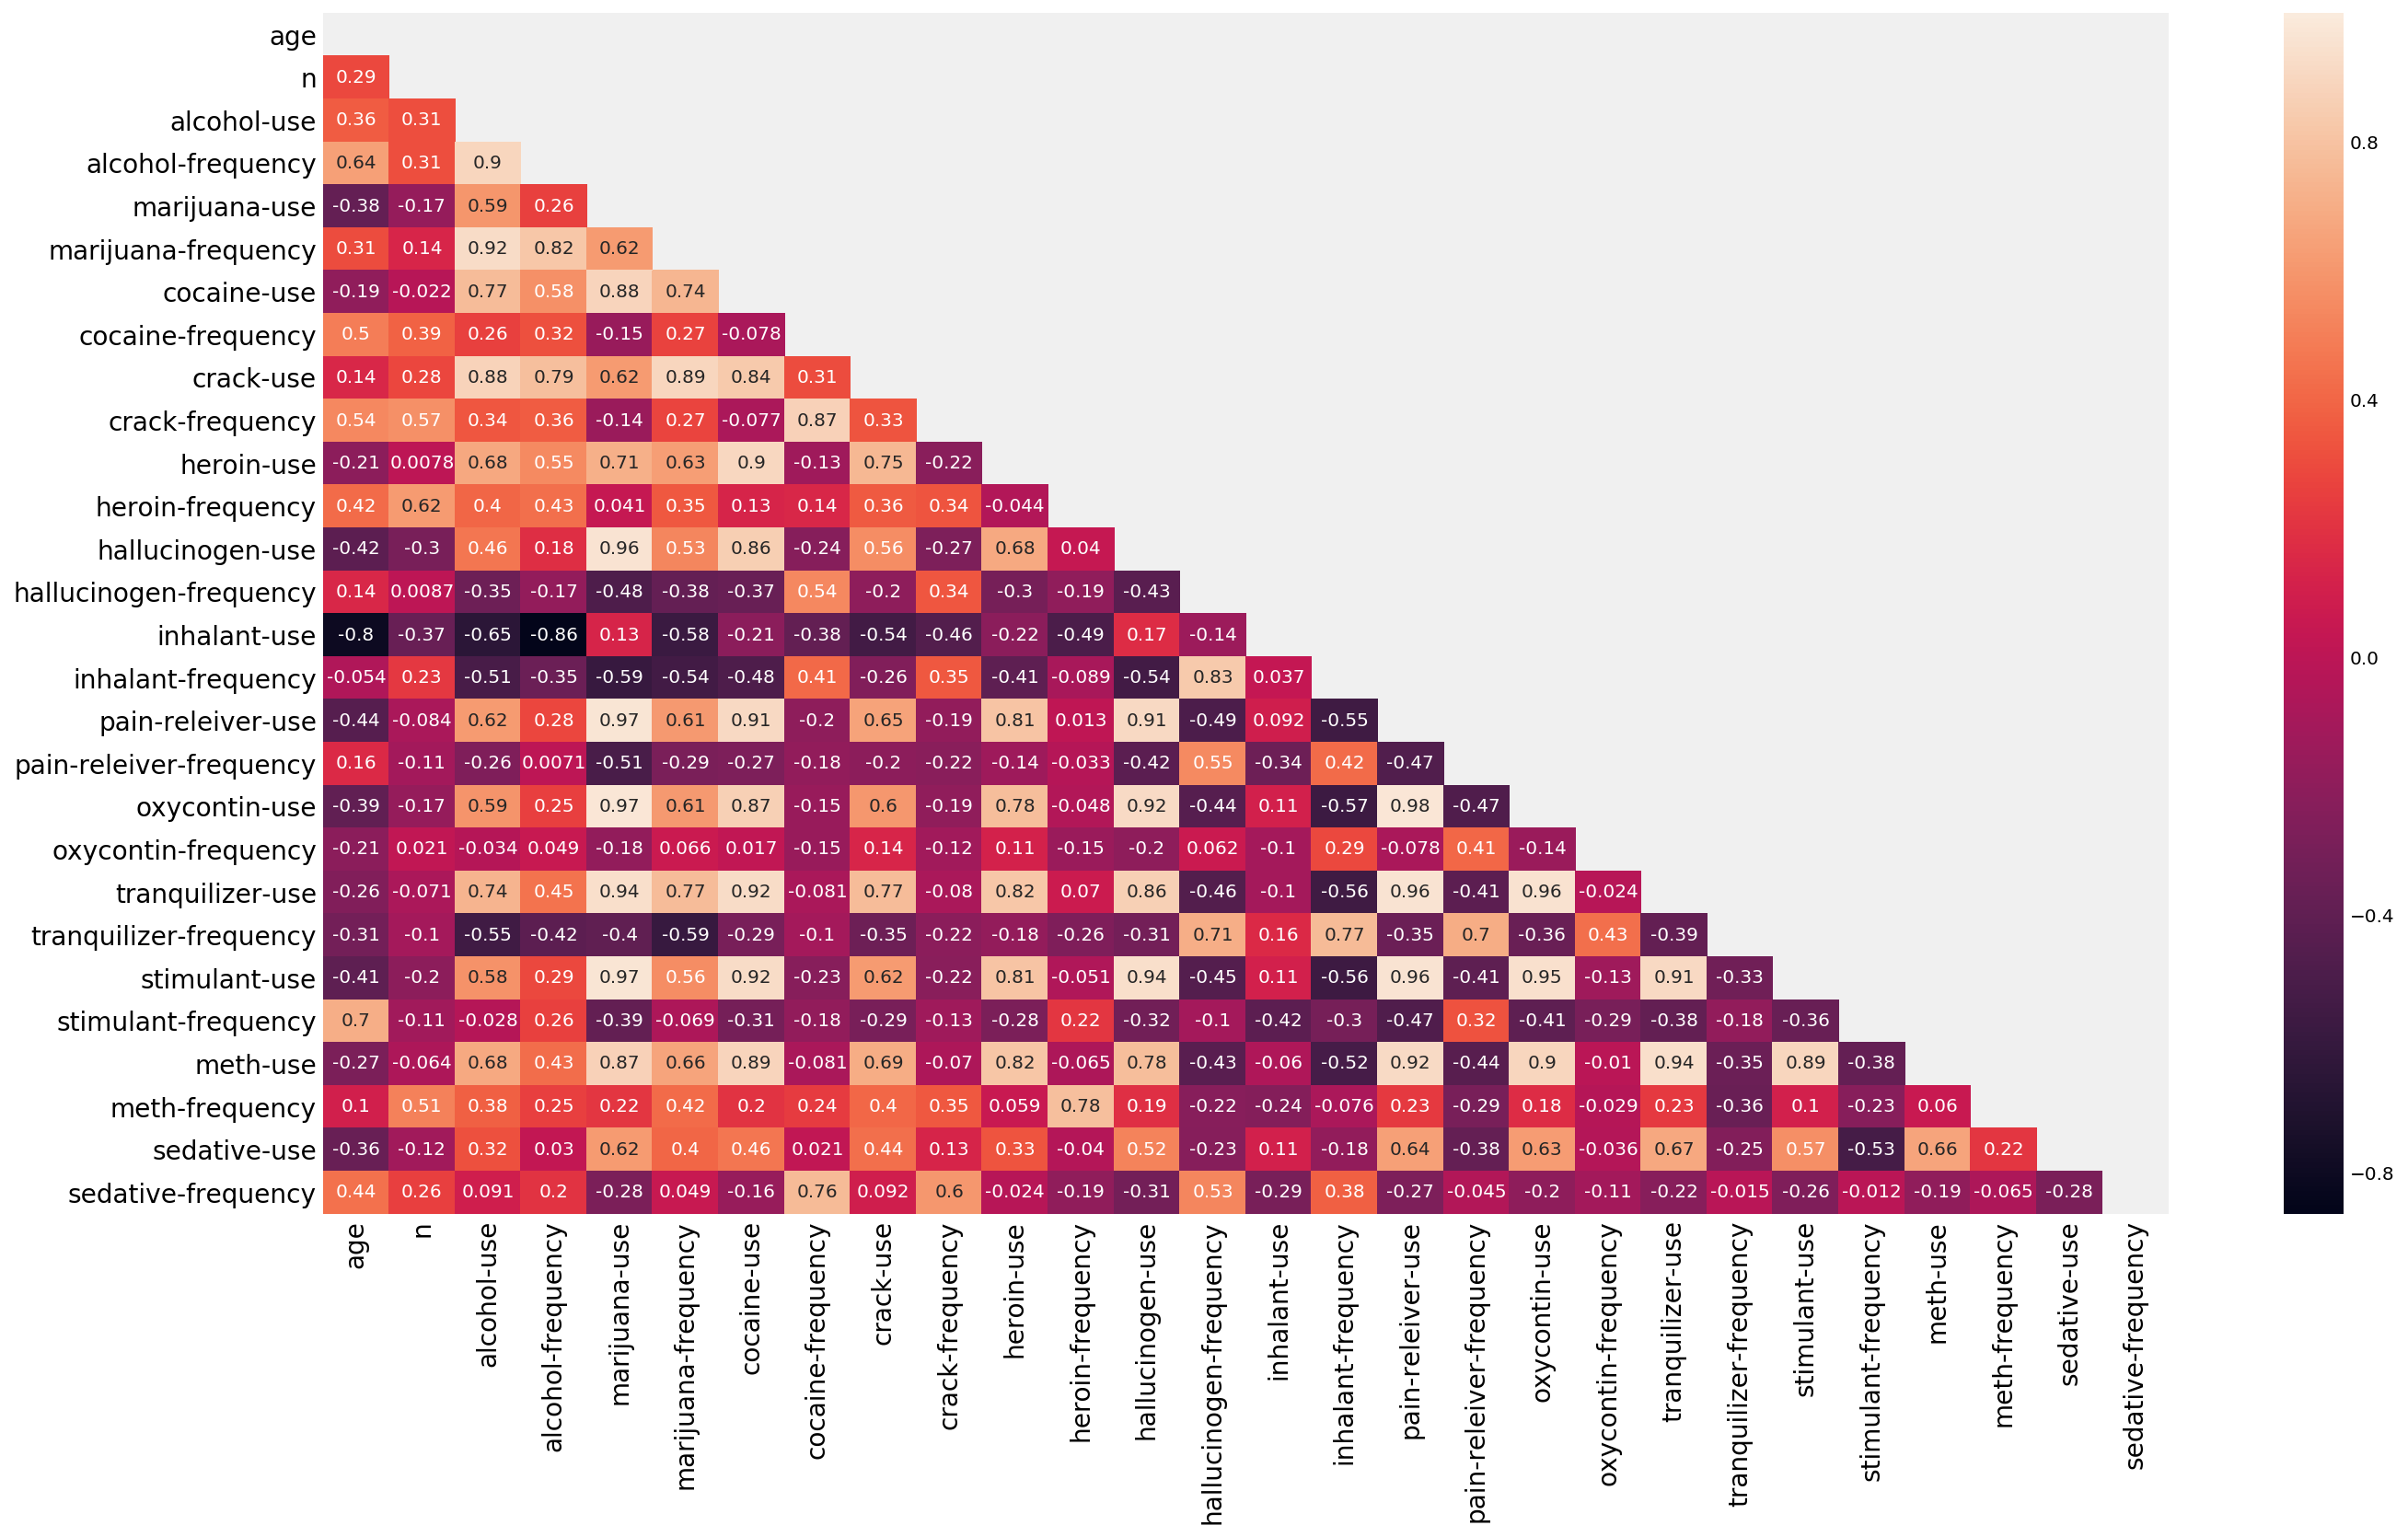

In [231]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(20, 12))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()
correlation_heat_map(drug_df)

In [152]:
sns.pairplot(drug_df);

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**
#### Ans:
##### Question:
what are the drugs that people could quit when they get older and the drugs that people could not quit when they get older?

##### Deliverables:

Lists of drugs names that people quit when they get older and the drugs that people quit when they get older.


In [247]:
# make a list of all percentage used column (that contain (use) word in their name)
percents_list = [col for col in drug_df.columns if 'use' in col]

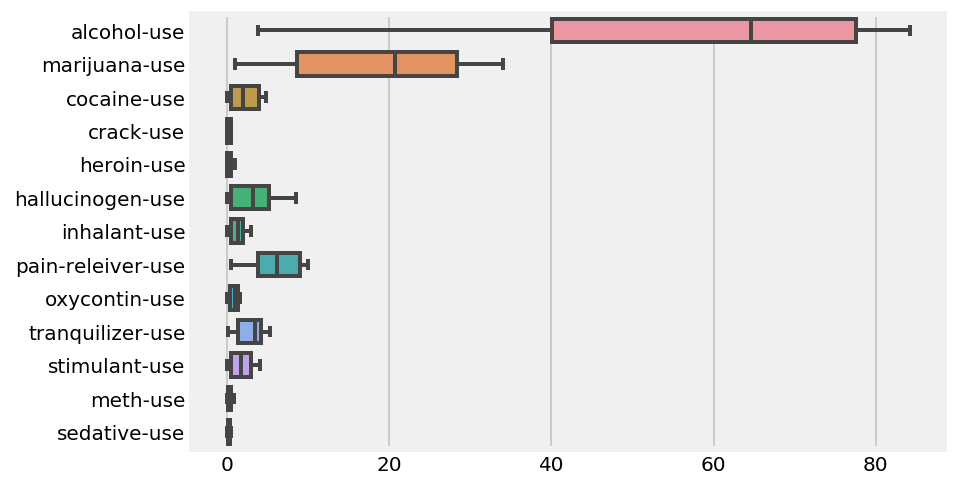

In [295]:
sns.boxplot(data=drug_df[percents_list] ,orient ="h" , width=0.7 , linewidth=2);

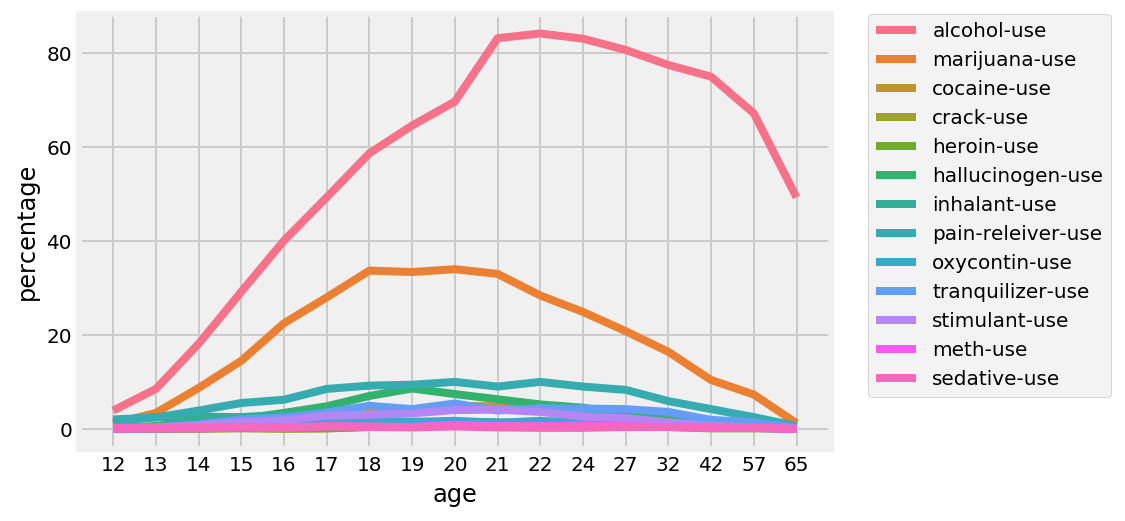

In [334]:
# without standardized percentage
sns.lineplot(data=drug_df[percents_list], dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title()
plt.xlabel('age')
plt.ylabel('percentage')
plt.xticks(np.arange(17), drug_df.age);

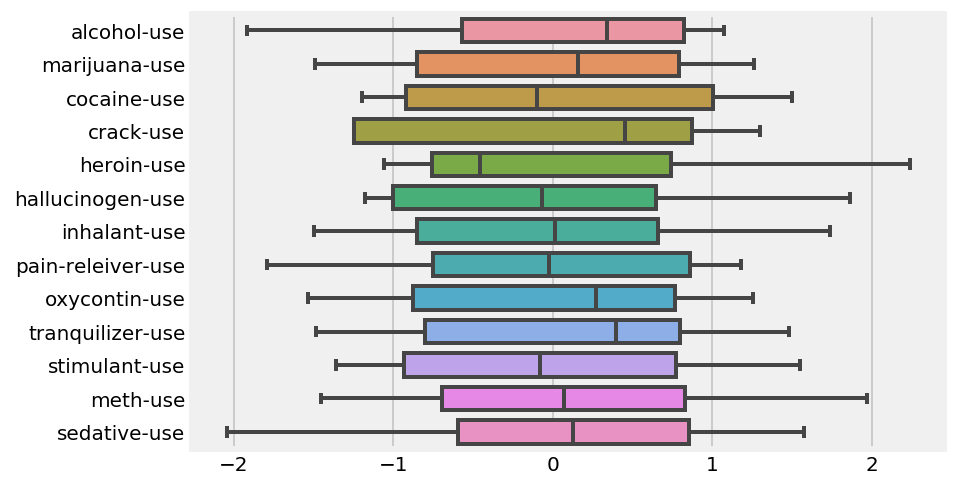

In [294]:
# standardize the data in order to compare between all drugs using percent
percents_list_std = var_standardized(drug_df[percents_list])
sns.boxplot(data=percents_list_std ,orient ="h", width=0.7 , linewidth=2);

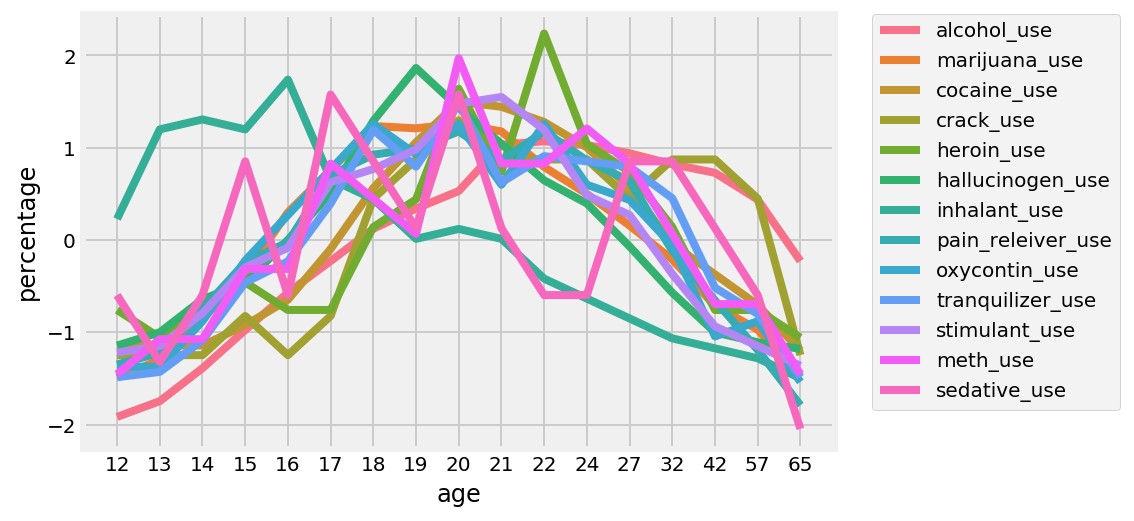

In [335]:
# with standardized percentage
sns.lineplot(data=percents_list_std, dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('age')
plt.ylabel('percentage')
plt.xticks(np.arange(17), drug_df.age);

The above visualization doesn't give us clear information, so we will plot each column separately as we do below.

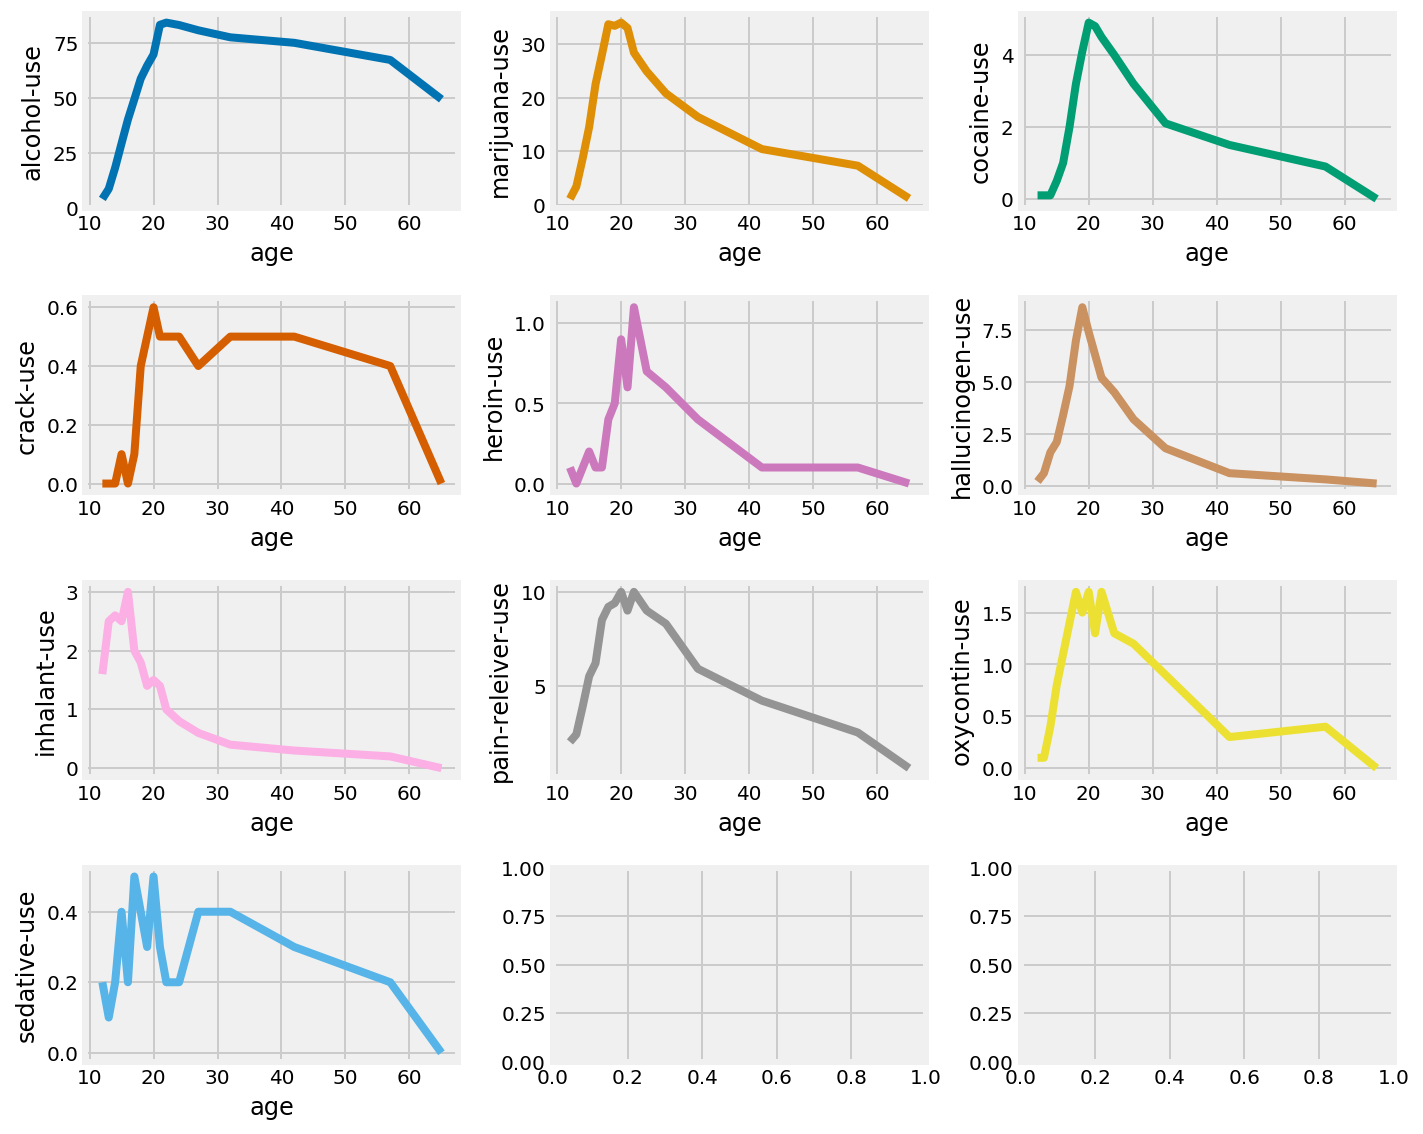

In [377]:
fig, ax = plt.subplots(nrows=4, ncols=3 , sharex=False, sharey=False, figsize=(10,8))

flatui = sns.color_palette("colorblind", 13)
c  =0
for i in range(3):
    for j in range(3):
        sns.lineplot(x=drug_df.age, y=drug_df[percents_list[c]], ax=ax[i,j], color=flatui[c])
        c+=1
sns.lineplot(x=drug_df.age, y=drug_df[percents_list[12]], ax=ax[3,0],color=flatui[c])
        

fig.tight_layout()
plt.show()

#### Results & Discussions:
The line plots above show the results of the correlation between the percentage of using each drug and age.

As shown most of the proportion of drug use decreased rapidly with age. 
Except for alcohol which it seems to be used after 20 years old without a significant decrease in use.

Interestingly, there was a difference in the ratio use of crack which is widely used even with age. After some research, a possible explanation for this might be that is Crack is difficult to quit without medical supervision.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

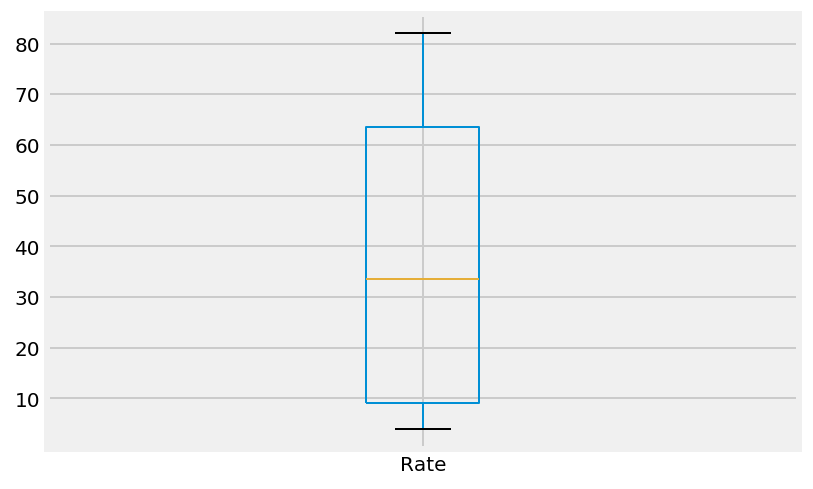

In [217]:
# Pull out the rate variable from the sat dataset
sat_df.boxplot('Rate', whis=True);

#### Ans:
* How you numerically define outliers

we can identify outliers by looking at how far a point is from the mean, often how many standard deviations from the mean.

    we can find outliers by different ways:
        - Z-Score:
        
        Standard Deviation based method to detect outliers
    In the standard deviation method, we consider all the points with values more than or less than the 3 times standard deviation from mean are considered outliers. In the code snippet below, we will use standard deviation method to detect and remove the outliers.

        - IQR Score
        
        1.5*IQR range --> below Q1 is lower bound and 
        -1.5*IQR range --> above Q3 is upper bound for outlier detection.
    

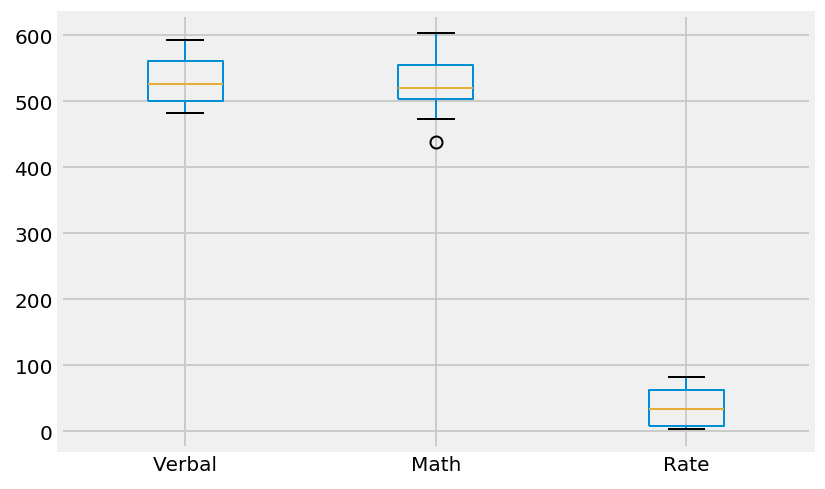

In [202]:
# Print out the outliers in the dataset.
sat_df.boxplot(['Verbal', 'Math','Rate'] , whis=True);

###### Are there outliers in the dataset?

As shown above, in boxes plot the dataset does not has outliers except one in Math column.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [387]:
sat_df.Verbal.corr(sat_df.Math, method='pearson')

0.899870852544429

In [385]:
sat_df.Verbal.corr(sat_df.Math, method='spearman')

0.9052048847940284

How does the Spearman correlation compare to the Pearson correlation?
* pearson : standard correlation coefficient
* spearman : Spearman rank correlation

Describe clearly in words the process of calculating the Spearman rank correlation.



### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

In [430]:
# Convert Rate to percentiles in the sat scores as a new column.
sat_df['Rate_percentiles'] = sat_df.Rate.apply(lambda x: stats.percentileofscore(sat_df.Rate, x))

In [427]:
# Show the percentile of California in Rate.
stats.percentileofscore(sat_df.Rate, sat_df.Rate[sat_df.State == 'CA'].values )

56.730769230769226

Spearman coefficient transforms all values to their percentile ranks.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?

We can use percentiles for outliers detection by using (Median and Interquartile Deviation Method (IQD)), for this method, the median of the residuals is calculated, along with the 25th percentile and the 75th percentile. The difference between the 25th and 75th percentile is the interquartile deviation (IQD). So by using percentiles, we can identify the range of outliers.


2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.

Ans: so that make it easy to compare between relations.

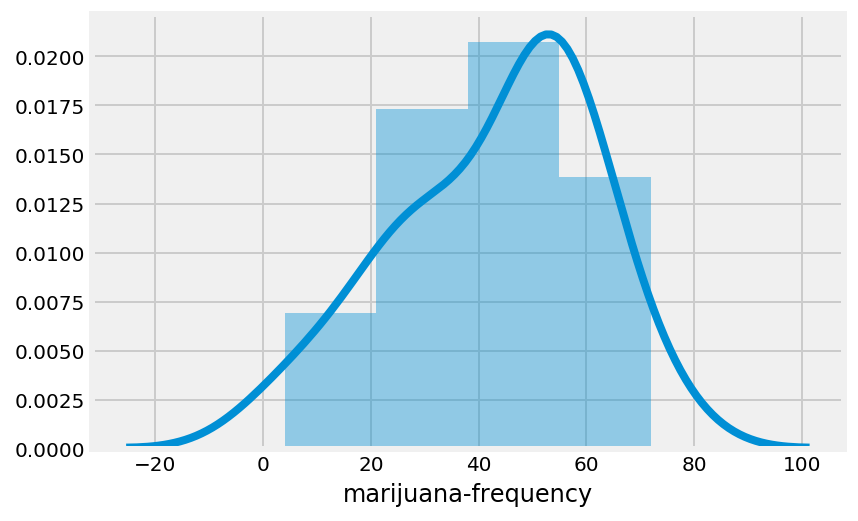

In [437]:
# Plot the distribution of a variable of your choice from the drug use dataset.

sns.distplot(drug_df['marijuana-frequency']);

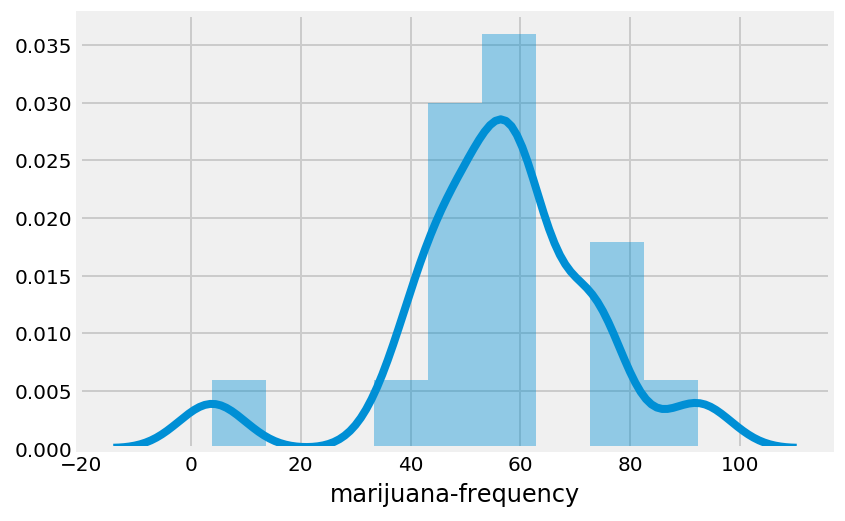

In [442]:
# Plot the same variable but percentile scored.
percentile_scored = drug_df['marijuana-frequency'].apply(lambda x: stats.percentileofscore(sat_df.Rate, x))
sns.distplot(percentile_scored);